# Inc. 5000 Analysis
## Identifying Opportunities in Inc. 5000

### Introduction to the Data

#### Dataset and Additional Information
- Inc. 5000 Sample Dataset from Tableau: 
https://public.tableau.com/app/resources/sample-data

- Inc. 5000 (2021): 
https://www.inc.com/inc5000/2021

- Initial Visualizations of Data: 
https://public.tableau.com/app/profile/edward.easton/viz/Inc_50002014/Story1

#### Features (i.e., ..., ...)
- Result Number (1, 2)
- Rank (1, 2)
- Metro (Washington, Los Angeles)
- State Metro (District of Columbia, California)
- City (Arlington, El Segundo)
- State_S (i.e., CA, CO)
- State_L (i.e., California, Colorado)
- Metro, State (Washington, District of Columbia)
- Workers (227, 191)
- Company (Fuhu, Quest Nutrition)
- Growth (158956.9106, 57347.9246)
- Revenue (195640000, 82640563)
- Industry (Consumer Products & Services, Food and Beverage)
- Years on List (2, 1)

#### Locations
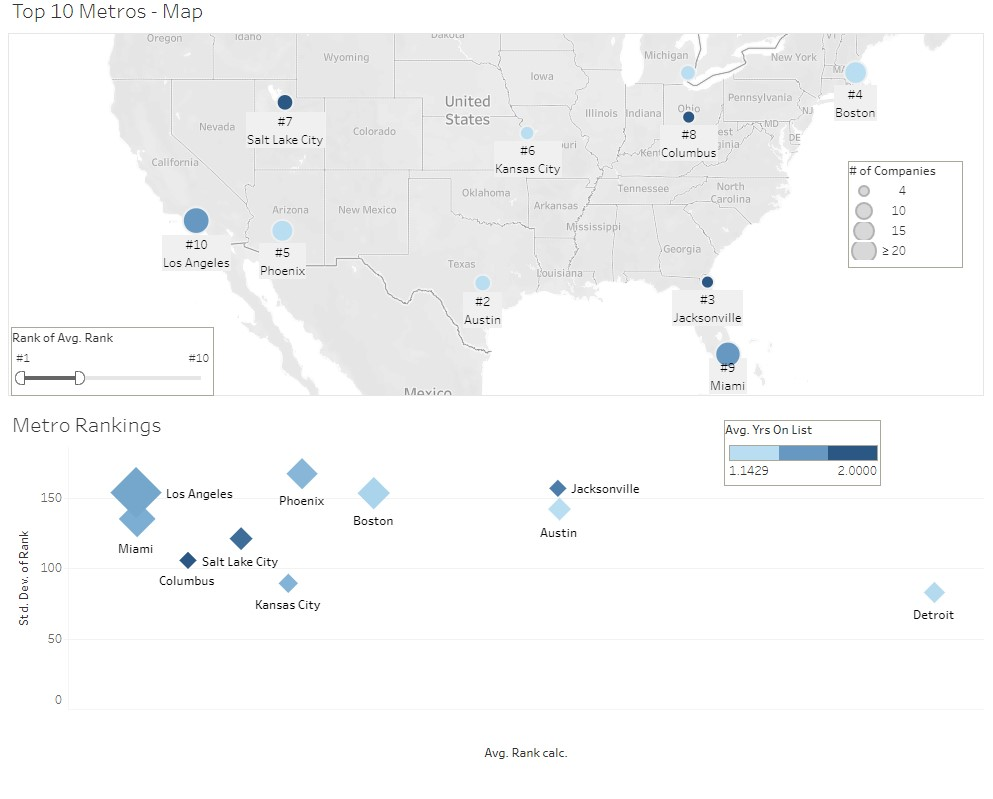

#### Industries
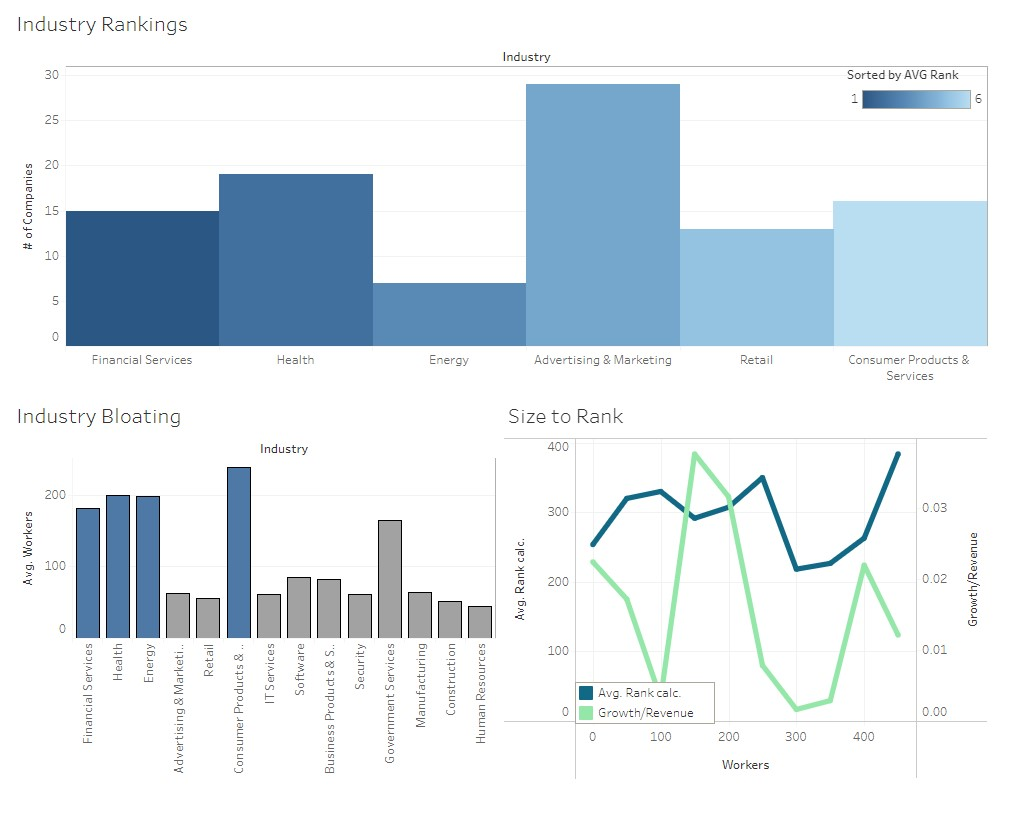

#### Areas of Interest
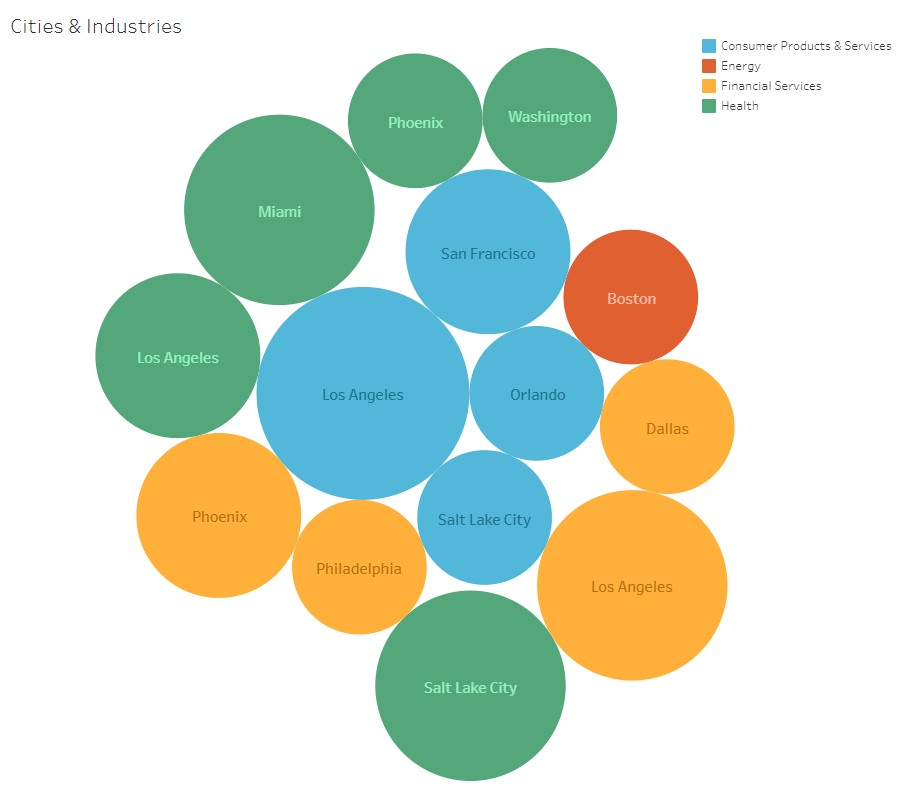

### Focus of Analysis
**Objective** 
- Identify growth trends/hotspots in Inc. 5000 

**Questions**
1. What locations are showing trends of consistent growth? 
2. What industries are showing consistent year-to-year growth? 
3. Are there inefficiencies that we can market to?



# Import and Overview

#### Import Data

In [1]:
# Importing libraries
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing the data
df = pd.read_excel('Real_Inc5000.xlsx')

#### Rename and Reshape

In [3]:
# Rename '_resultNumber' to 'id' and 'yrs_on_list' to 'years'; set index as id
df = df.rename(columns = {'_resultNumber':'id', 'yrs_on_list':'years'}).set_index('id', drop = True)

# Drop 'metro, state', 'company' columns
df_inc = df.drop(['metro, state', 'company'], axis = 1)

# Create company name dataframe for later ID of companies
df_company = df.loc[:, ['rank', 'company']]

# Check successful creation and changes to dataframes
display(df_inc.head())
display(df_company.head())

# See info of data
print(df.info())

,rank,metro,state_metro,city,state_s,state_l,workers,growth,revenue,industry,years
id,,,,,,,,,,,
1,1,Los Angeles,California,El Segundo,CA,California,227,158956.9106,195640000,Consumer Products & Services,2
2,2,Los Angeles,California,El Segundo,CA,California,191,57347.9246,82640563,Food & Beverage,1
3,3,Washington,District of Columbia,Arlington,VA,Virginia,145,55460.1646,85076502,Business Products & Services,1
4,4,San Jose,California,Palo Alto,CA,California,62,26042.9630,35293000,Software,1
5,5,Boston,Massachusetts,Maynard,MA,Massachusetts,92,20690.4578,77652360,Telecommunications,1


,rank,company
id,,
1,1,Fuhu
2,2,Quest Nutrition
3,3,Reliant Asset Management
4,4,Superfish
5,5,Acacia Communications


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          500 non-null    int64  
 1   metro         500 non-null    object 
 2   state_metro   500 non-null    object 
 3   city          500 non-null    object 
 4   state_s       500 non-null    object 
 5   state_l       500 non-null    object 
 6   metro, state  500 non-null    object 
 7   workers       500 non-null    int64  
 8   company       500 non-null    object 
 9   growth        500 non-null    float64
 10  revenue       500 non-null    int64  
 11  industry      500 non-null    object 
 12  years         500 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 54.7+ KB
None


In [5]:
# Combine metro and state_metro columns for better sorting/readability
df_inc['metro_state'] = df_inc.metro.str.cat(df_inc.state_metro,sep="_")
df_inc['metro_state'] = df_inc['metro_state'].str.strip()

# Combine city and state_l columns for better sorting/readability
df_inc['city_state'] = df_inc.city.str.cat(df_inc.state_l,sep="_")
df_inc['city_state'] = df_inc['city_state'].str.strip()

# Drop redundant location columns
df_inc = df_inc.drop(['metro', 'state_metro', 'city', 'state_l'], axis = 1)

# Check successful changes
df_inc.head()

,rank,state_s,workers,growth,revenue,industry,years,metro_state,city_state
id,,,,,,,,,
1,1,CA,227,158956.9106,195640000,Consumer Products & Services,2,Los Angeles_California,El Segundo_California
2,2,CA,191,57347.9246,82640563,Food & Beverage,1,Los Angeles_California,El Segundo_California
3,3,VA,145,55460.1646,85076502,Business Products & Services,1,Washington_District of Columbia,Arlington_Virginia
4,4,CA,62,26042.9630,35293000,Software,1,San Jose_California,Palo Alto_California
5,5,MA,92,20690.4578,77652360,Telecommunications,1,Boston_Massachusetts,Maynard_Massachusetts


#### Check Integrity

In [6]:
# Check for duplicates (Check for nulls)
print('Number of Duplicates:', df_inc.duplicated(subset = ['rank']).sum())

Number of Duplicates: 0


In [7]:
# Check shape of merged dataset
print('Dataframe shape:', df_inc.shape)

Dataframe shape: (500, 9)


#### Modify Features and Assign Datatypes

In [8]:
# Convert revenue into millions
df_inc['revenue'] = (df_inc['revenue'] / 1000000).round(1)

# Convert 'growth' to int64
df_inc['growth'] = df_inc['growth'].round(0).astype('int64')

In [9]:
# Rename 'revenue': 'revenue(M)'
df_inc = df_inc.rename(columns = {'revenue': 'revenue(M)'})

In [10]:
# Import Categorical Dtype from pandas
from pandas.api.types import CategoricalDtype

In [11]:
# Assign rank as dataframe
df_rank = df_inc['rank']

# Defining numerical and categorical columns
num_cols = df_inc.select_dtypes(include='number').columns.drop(labels = ['years', 'rank'])
cat_cols = df_inc.select_dtypes(exclude='number').columns

# Set all objects to categories
df_inc[cat_cols] = df_inc[cat_cols].astype('category')

In [12]:
# Get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
# Check dtypes
df_inc.dtypes

rank              int64
state_s        category
workers           int64
growth            int64
revenue(M)      float64
industry       category
years             int64
metro_state    category
city_state     category
dtype: object

#### See Dataset Statistics

In [14]:
# Describe data statistics
df_inc[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
workers,500.00,100.60,310.23,1.00,17.00,35.00,89.00,5603.00
growth,500.00,3314.21,8290.83,942.00,1268.50,1827.50,2952.75,158957.00
revenue(M),500.00,30.43,166.59,2.00,4.47,8.10,18.97,3487.90


#### Bin Numerical Columns from Quantile Statistics

In [15]:
# Bin num_cols using quantiles- key: {'Low': min-25%, 'Medium': 25%-50%, 'High': 50%-75%, 'Very High': 75%-100%}
q_bins = pd.DataFrame()

for i in df_inc[num_cols]: # loop through each num_col
    bin = pd.qcut(df_inc[i], 4, labels = ['Low', 'Medium', 'High', 'Very High']) # call pandas qcut function

    bin_cols = bin.to_frame(name = '{}_q'.format(i)) # create temporary dataframe

    q_bins = pd.concat([q_bins, bin_cols], axis = 1) # Concat temp df to final qcut df

# create q_cols
q_cols = q_bins.columns

# Merge q_cols to df_inc
df_inc = df_inc.merge(q_bins, how = 'left', on = 'id')

#### Bin Numerical Columns using KMeans method

In [16]:
# kbins function
def kbins(cols, data, bins, strat):
    
    from sklearn.preprocessing import KBinsDiscretizer # Load in KBins library
    
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy= strat) # establishing kbins function & parameters

    data_trans = data[cols] # getting just cols we want

    columns = est.fit(data_trans).feature_names_in_.tolist() # getting column names for output

    for index, col in enumerate(columns): # adding kbins identifier
        columns[index] = col + '_k'

    df = pd.DataFrame(est.fit_transform(data_trans), 
                      index = data_trans.index,
                      columns = columns,
                      dtype = 'int64') # fit & transform data, create dataframe from new data

    return df

In [17]:
# Binning num type using kbins
df_bin = kbins(num_cols, df_inc, 10, 'kmeans')

In [18]:
# Merge and add k_cols to num_cols
df_inc = pd.merge(df_inc, df_bin, how = 'left', on = 'id')

# Create k_cols
k_cols = df_bin.columns

#### Create 'rating' column from 'rank'

In [19]:
# Create new column 'rating' from 'rank'
# Get rank
df_rank = df_inc.loc[:, ['rank']]

# Bin rank column 
df_rating = kbins(df_rank.columns, df_rank, 5, 'uniform')

# replace categorical labels with ordinal labels
df_rating = df_rating.replace([0, 1, 2, 3, 4], [5, 4, 3, 2, 1]).rename(columns = {'rank_k': 'rating'})

# Merge rating with df_inc
df_inc = pd.merge(df_inc, df_rating, how = 'left', on = 'id')

#### Check Integrity

In [20]:
# Check changes for duplicates and nulls; get final df shape
print('Duplicates?:', df_inc.duplicated(subset = 'rank').sum(), '\n')

print('Nulls?:', df_inc['rank'].isna().sum(), '\n')

print('df_inc shape:', df_inc.shape)

Duplicates?: 0 

Nulls?: 0 

df_inc shape: (500, 16)


#### Sort Data for Easy Viewing

In [21]:
# Create sub-groups
loc_cols = pd.Index(('metro_state', 'city_state', 'state_s'))

finance_col = num_cols.drop(['workers'])

In [22]:
# Create reorder function
def reorder(data, col_order):

    data = data.loc[:, col_order]

    return data

In [23]:
# Reorder columns
col_order = ['rank', 'rating'] + loc_cols.to_list() + ['industry', 'years', 'workers'] + finance_col.to_list() + q_cols.to_list() + k_cols.to_list()

df_inc = reorder(df_inc, col_order)

# See final dataframe
df_inc.head()

,rank,rating,metro_state,city_state,state_s,industry,years,workers,growth,revenue(M),workers_q,growth_q,revenue(M)_q,workers_k,growth_k,revenue(M)_k
id,,,,,,,,,,,,,,,,
1,1,5,Los Angeles_California,El Segundo_California,CA,Consumer Products & Services,2,227,158957,195.60,Very High,Very High,Very High,3,9,3
2,2,5,Los Angeles_California,El Segundo_California,CA,Food & Beverage,1,191,57348,82.60,Very High,Very High,Very High,3,8,2
3,3,5,Washington_District of Columbia,Arlington_Virginia,VA,Business Products & Services,1,145,55460,85.10,Very High,Very High,Very High,2,8,2
4,4,5,San Jose_California,Palo Alto_California,CA,Software,1,62,26043,35.30,High,Very High,Very High,1,7,1
5,5,5,Boston_Massachusetts,Maynard_Massachusetts,MA,Telecommunications,1,92,20690,77.70,Very High,Very High,Very High,2,7,2


#### View Unique Values and Value Counts for Each Feature

In [24]:
# See value counts and number of uniques for cat_cols
for i in cat_cols:
    print('Number of Unique Values in ', i, ':', df_inc[i].nunique(), '\n') # Get number of unique values

    percent = df_inc[i].value_counts(normalize = True).to_frame(name = 'percentage') # Get normalized value counts

    total = df_inc[i].value_counts().to_frame(name = 'total') # Get regular value counts

    df_value = pd.concat([total, percent], axis = 1) # Combine frames

    display(df_value.head(10)) # See top 10 values for each feature

    print('\n', "--" * 47, "\n\n") # Add divider

Number of Unique Values in  state_s : 45 



,total,percentage
CA,92,0.18
NY,46,0.09
FL,39,0.08
TX,36,0.07
VA,32,0.06
IL,21,0.04
GA,15,0.03
NJ,14,0.03
MA,14,0.03
UT,14,0.03



 ---------------------------------------------------------------------------------------------- 


Number of Unique Values in  industry : 25 



,total,percentage
Advertising & Marketing,63,0.13
IT Services,59,0.12
Software,41,0.08
Health,38,0.08
Consumer Products & Services,37,0.07
Financial Services,32,0.06
Government Services,28,0.06
Retail,26,0.05
Business Products & Services,26,0.05
Construction,22,0.04



 ---------------------------------------------------------------------------------------------- 


Number of Unique Values in  metro_state : 113 



,total,percentage
New York_New York,53,0.11
Los Angeles_California,35,0.07
Washington_District of Columbia,31,0.06
San Francisco_California,26,0.05
Chicago_Illinois,21,0.04
Dallas_Texas,19,0.04
Miami_Florida,18,0.04
Atlanta_Georgia,15,0.03
Boston_Massachusetts,14,0.03
Phoenix_Arizona,13,0.03



 ---------------------------------------------------------------------------------------------- 


Number of Unique Values in  city_state : 296 



,total,percentage
New York_New York,31,0.06
San Francisco_California,14,0.03
Los Angeles_California,12,0.02
Chicago_Illinois,9,0.02
San Diego_California,9,0.02
Atlanta_Georgia,8,0.02
Miami_Florida,7,0.01
Scottsdale_Arizona,7,0.01
Washington_District of Columbia,7,0.01
Austin_Texas,7,0.01



 ---------------------------------------------------------------------------------------------- 




# EDA and Preprocessing

#### Define Plot Functions

In [25]:
# Define function to get target variable pivotframe
def target_pivotframe(data, column, target_variable):
    
    pivot_values = data.groupby(column)[target_variable].value_counts(normalize = True).to_frame(name = 'value_counts').reset_index(level = target_variable)

    pivot_frame = pivot_values.pivot(columns = target_variable, values = 'value_counts')

    df_pivot = pivot_frame.fillna(0).astype('float64')

    return df_pivot

In [26]:
# Define function to get horizontal stacked barplot to analyze target variable distribution
def target_stackedplot(data, column, target_variable):

    target_data = target_pivotframe(data, column, target_variable).sort_values([5], ascending = True)
    
    target_data = target_data.iloc[:, 6::-1]
    
    from matplotlib.colors import ListedColormap

    stack_color = sns.cubehelix_palette(start=2.8, rot=.1, reverse = True, as_cmap = True)

    fig, ax = plt.subplots(figsize=(20, 12))

    target_data.plot(kind = 'barh', stacked = True, ax = ax, cmap = stack_color)

    plt.ylabel('# of Companies')
    plt.xlabel('%')
    plt.title('Rating Distribution by Industry')

    plt.tight_layout()
    plt.show()

In [27]:
# Define histogram plot function for numeric dtype distributions
def hist_plot(cols, data):
    
    #  plot Numerical Data
    a = len(cols)  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter

    # Num Visualizations
    fig = plt.figure(figsize=(b*6,a*3))

    for i in cols: # iterate subplots
        plt.subplot(a, b, c)
        plt.title('{}'.format(i).capitalize())
        sns.distplot(data[i], bins = 5).set(xlabel=None)
        c = c + 1

    plt.tight_layout()
    plt.show()

In [28]:
# Check distribution and outliers for numerical columns
def num_dist_outliers(cols, data):

    for col in cols:

        print(col)

        print('Skew :', round(data[col].skew(), 2))

        plt.figure(figsize = (14, 2))

        plt.subplot(1,2,1)

        data[col].hist(bins = 10, grid = False, color = 'b')

        plt.xlabel(col)

        plt.ylabel('count')

        plt.subplot(1, 2, 2)

        sns.boxplot(x = data[col], color = 'm')

        plt.xlabel(col)

        plt.show()

In [29]:
# Define function that visualizes correlation with a target variable through a heatmap
def target_heatmap(cols, data, target_variable):

    # define subplots
    a = len(cols)  # number of rows
    b = 5  # number of columns
    c = 1  # initialize plot counter

    # create figure
    fig = plt.figure(figsize = (24, 15))

    # create crosstable and heatmap
    for i in cols:
        cross_table = pd.crosstab(
        index= data[target_variable],
        columns= data[i],
        normalize = 'all').mul(100).round(1)

        ax = plt.subplot(a, b, c)
        sns.heatmap(cross_table, annot=True, fmt = "g", linewidths=.5, cmap = 'flare_r')

        # .set(xlabel=None)
        plt.title('{}'.format(i))    
        plt.xlabel(None)
        c = c + 1

    plt.tight_layout()
    plt.show()

In [30]:
# Create stripplot function that compares features with target variable 
def target_stripplot(cols, data, target_variable):
    #  plot Numerical Data
    a = len(cols)  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter

    # Num Visualizations
    fig = plt.figure(figsize=(b*6, a*5))

    for i in cols:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(target_variable)
        plt.ylabel(None)
        ax = sns.stripplot(x = target_variable, y = i, data = data)
        c = c + 1

    plt.tight_layout()
    plt.show()

In [31]:
# See how all features correlate using a heatmap
def heatmap_all(data):

    heat_palette = sns.color_palette("light:b", as_cmap=True)

    plt.figure(figsize = (6, 5))

    sns.heatmap(data.corr(), annot = True, fmt = ".2f", cmap = heat_palette, linewidths = .5, robust = True, square = True)
    
    plt.show()

#### Define Normalize Function

In [32]:
# Power transformer function for normalizing data
def power_transform(cols, data):
    # Power Transformer
    from sklearn.preprocessing import PowerTransformer

    pt = PowerTransformer(method = 'box-cox', standardize = False)

    data_trans = data[cols]

    columns = pt.fit(data_trans).feature_names_in_.tolist()

    for index, col in enumerate(columns): # adding kbins identifier
        columns[index] = col + '_pt'

    data_fit = pd.DataFrame(pt.fit_transform(data_trans), index = data_trans.index, columns = columns)

    return data_fit

#### Set Visualization Themes

In [33]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# Set plot style
jtplot.style(context = 'talk', spines = False, grid = False)

# Define Seaborn theme function
sns.set_theme(style = 'dark')
sns.set_palette('magma', color_codes = True)

## Create Visualizations

#### Viewing Numerical Data Distribution with Histogram

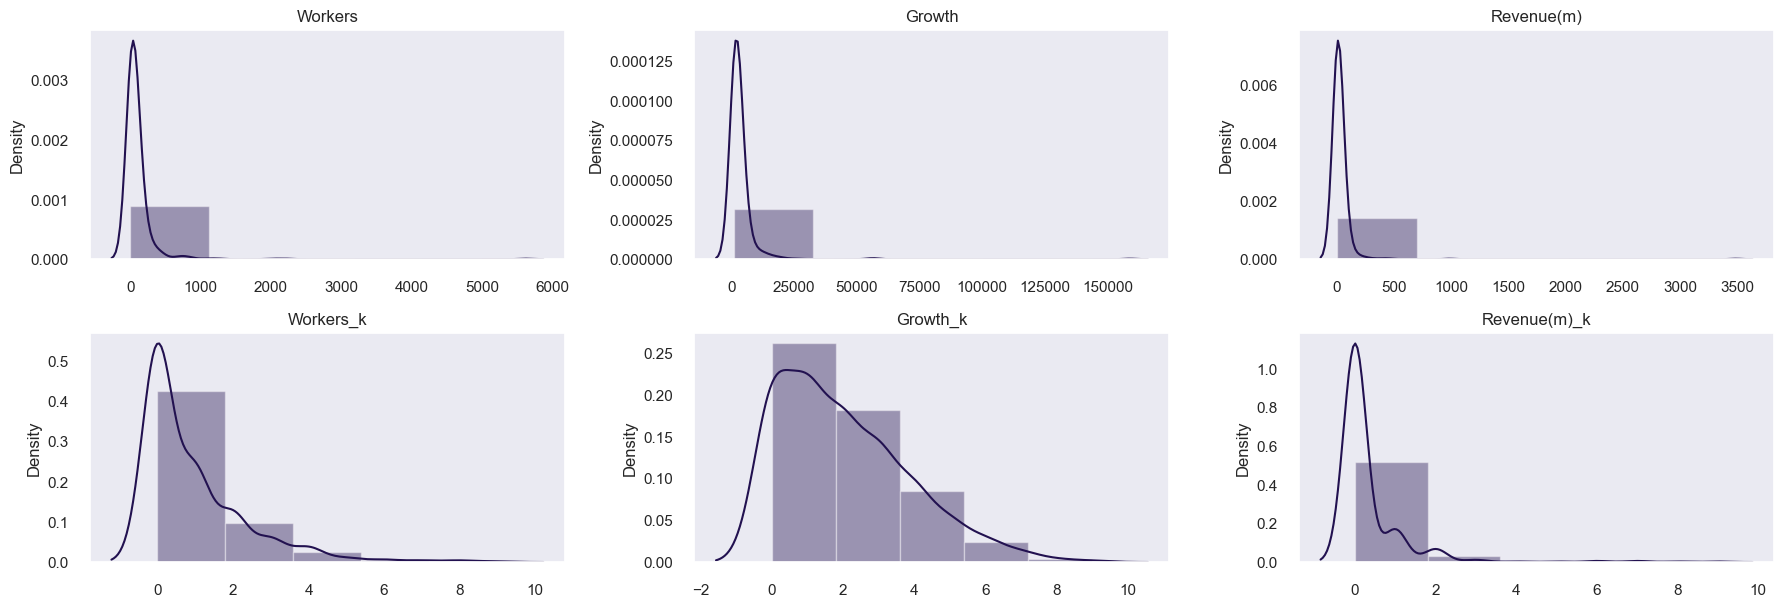

In [34]:
# Make a histogram to analyze numeric values
hist_plot(num_cols.append(k_cols), df_inc)

Here we can see that utlizing the kbins function has helped to normalize the data considerably without needing to remove outliers.

#### Viewing Numerical Distribution and outliers with Histogram and Box & Whisker

workers
Skew : 12.66


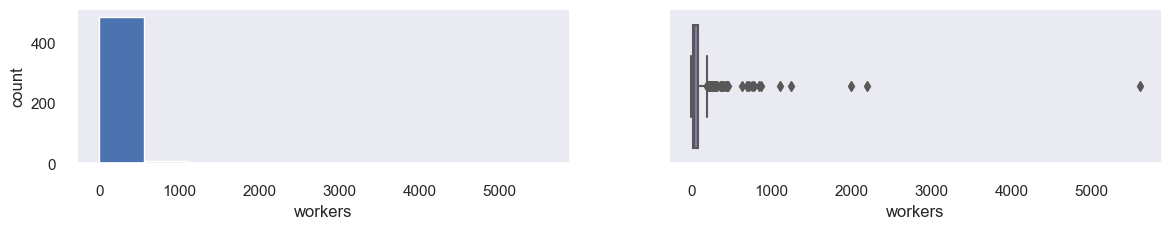

growth
Skew : 14.51


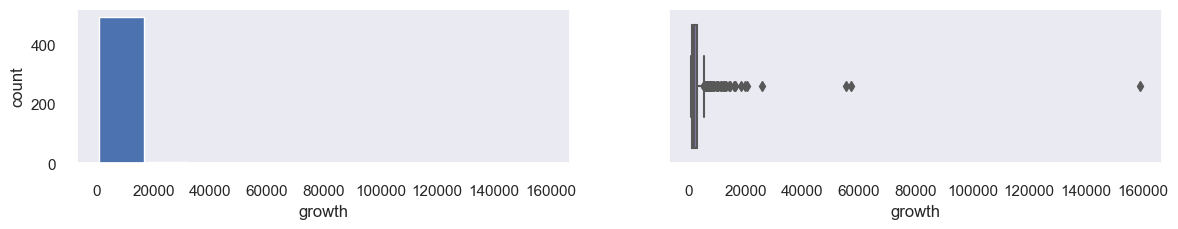

revenue(M)
Skew : 18.45


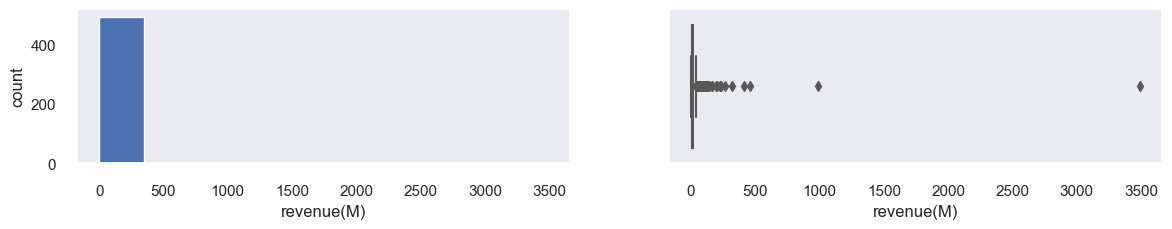

In [35]:
# Check numeric distributions
num_dist_outliers(num_cols, df_inc)

#### Normalizing Numerical Data with Power Transform (Box-Cox Method)

In [36]:
# Normalize data and check frame
pt_df = power_transform(num_cols, df_inc)
pt_df.head()

,workers_pt,growth_pt,revenue(M)_pt
id,,,
1,4.42,1.28,2.52
2,4.30,1.28,2.34
3,4.12,1.28,2.35
4,3.52,1.28,2.11
5,3.81,1.28,2.33


#### Reviewing Change to Data after Normalization

workers_pt
Skew : -0.01


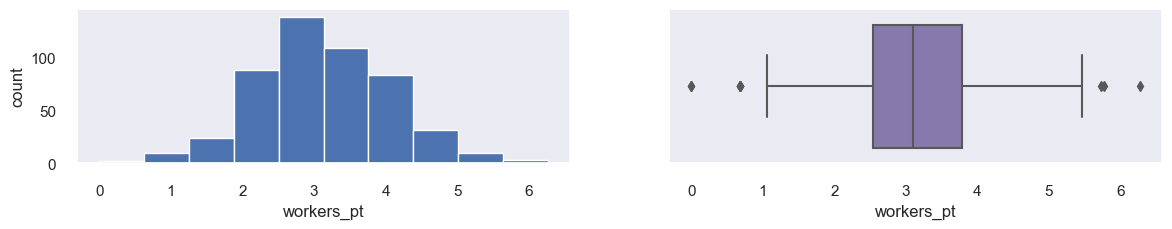

growth_pt
Skew : 0.2


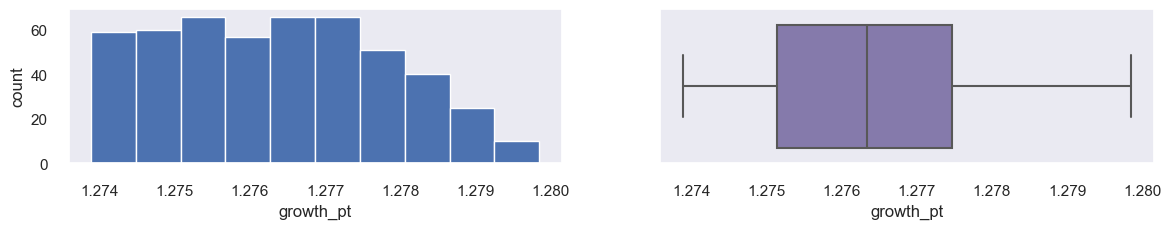

revenue(M)_pt
Skew : 0.09


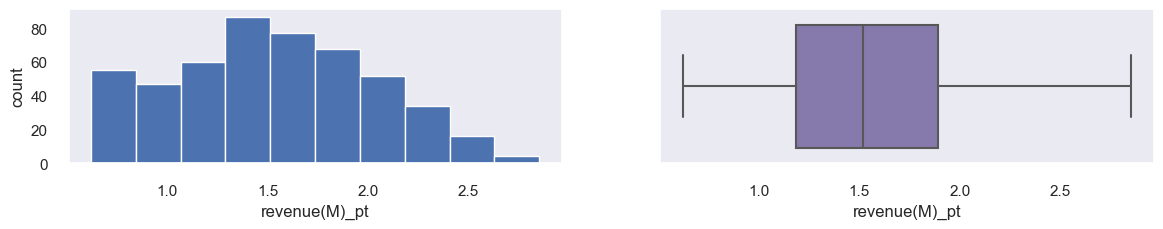

In [37]:
# Check numeric distributions after power transform
num_dist_outliers(pt_df.columns, pt_df)

#### Combining New Data with Primary DataFrame

In [38]:
# Merge, drop, and align
pt_cols = pt_df.columns

df_inc = pd.merge(df_inc.drop(num_cols, axis = 1), pt_df, how = 'left', on = 'id')

for values in num_cols:
    col_order.remove(values)

col_order[10:10] = pt_df.columns.to_list() #reorder

df_inc = reorder(df_inc, col_order)

df_inc.head()

,rank,rating,metro_state,city_state,state_s,industry,years,workers_q,growth_q,revenue(M)_q,workers_pt,growth_pt,revenue(M)_pt,workers_k,growth_k,revenue(M)_k
id,,,,,,,,,,,,,,,,
1,1,5,Los Angeles_California,El Segundo_California,CA,Consumer Products & Services,2,Very High,Very High,Very High,4.42,1.28,2.52,3,9,3
2,2,5,Los Angeles_California,El Segundo_California,CA,Food & Beverage,1,Very High,Very High,Very High,4.30,1.28,2.34,3,8,2
3,3,5,Washington_District of Columbia,Arlington_Virginia,VA,Business Products & Services,1,Very High,Very High,Very High,4.12,1.28,2.35,2,8,2
4,4,5,San Jose_California,Palo Alto_California,CA,Software,1,High,Very High,Very High,3.52,1.28,2.11,1,7,1
5,5,5,Boston_Massachusetts,Maynard_Massachusetts,MA,Telecommunications,1,Very High,Very High,Very High,3.81,1.28,2.33,2,7,2


#### Viewing Industry 'Rating' Distribution 

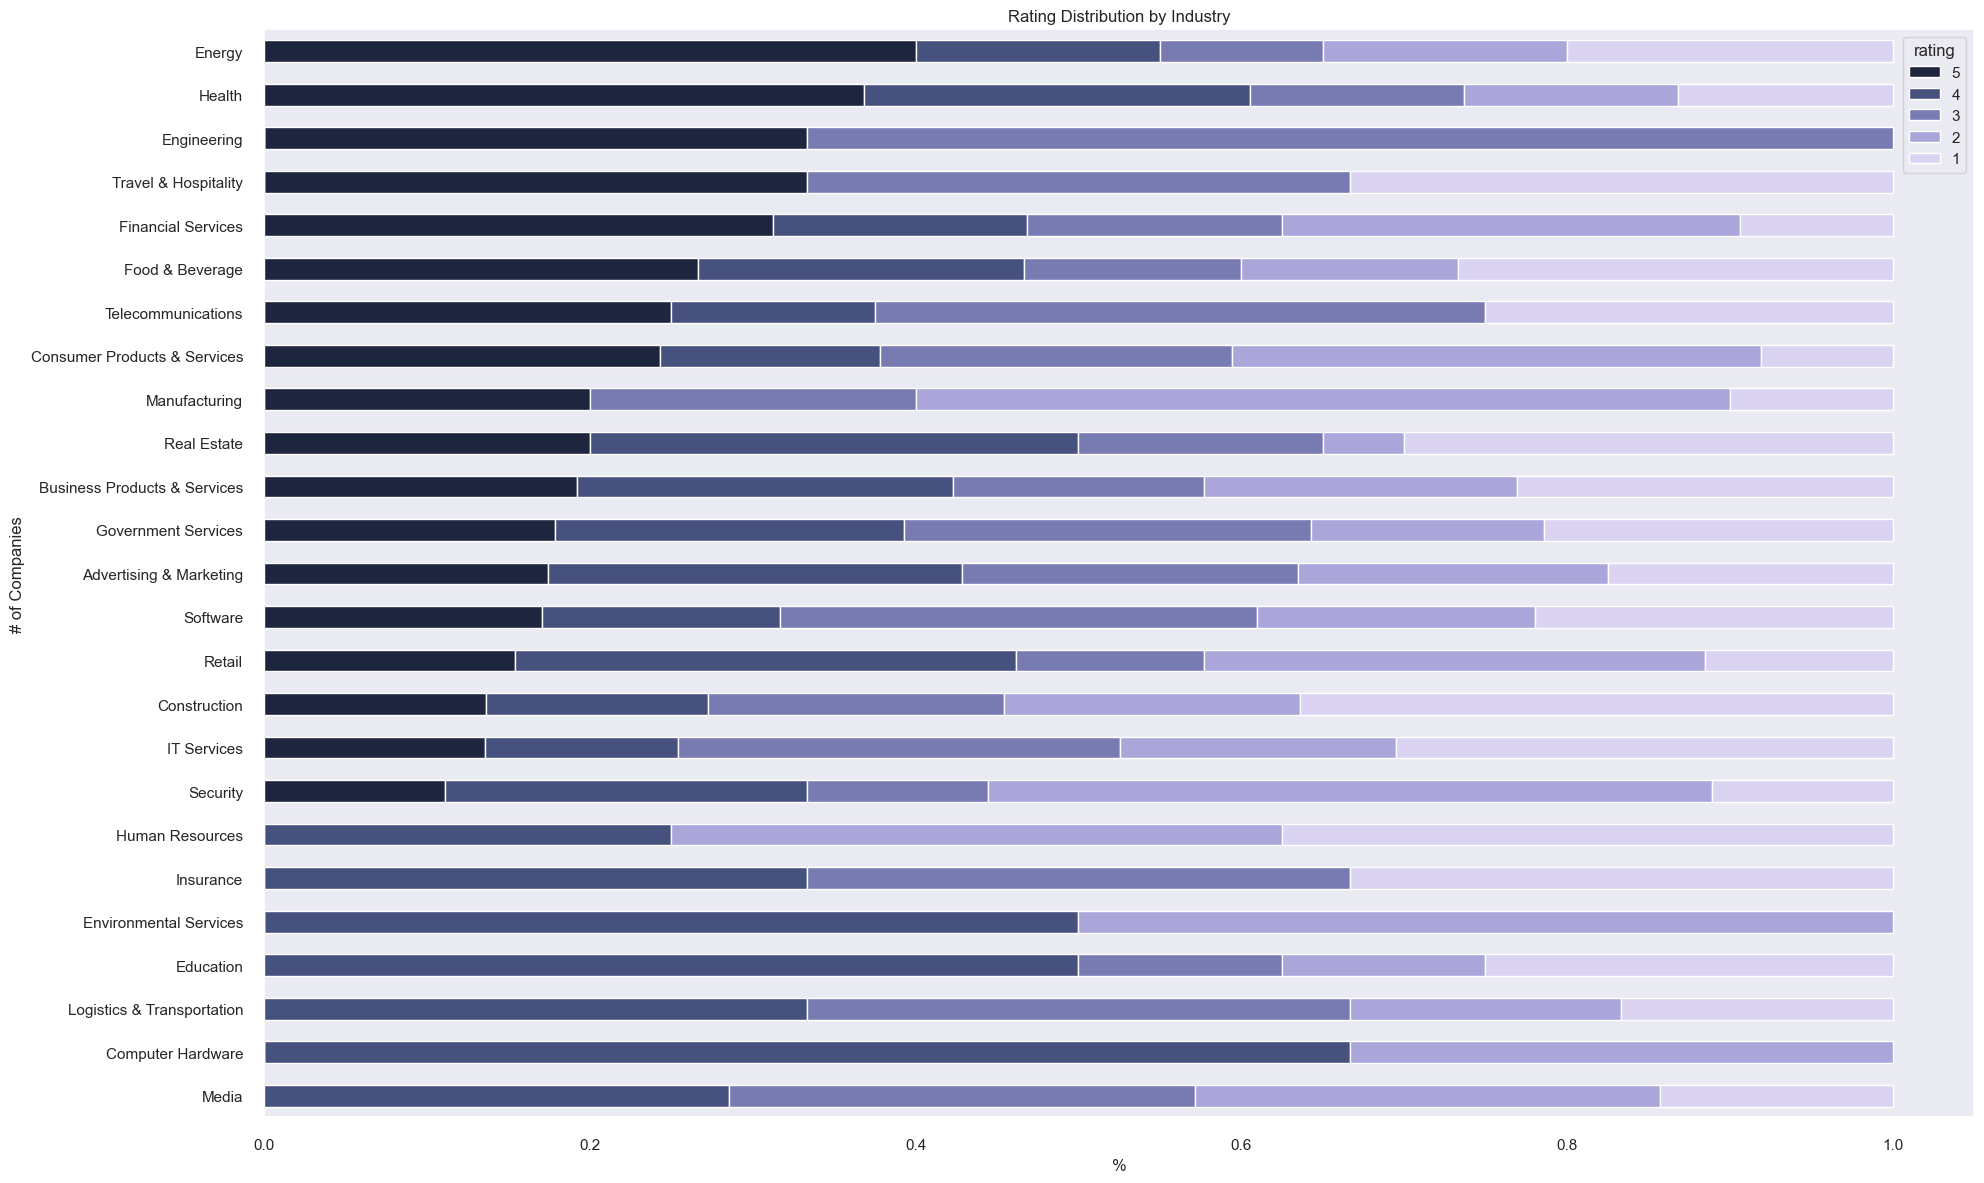

In [39]:
# Call target stacked plot
target_stackedplot(df_inc, 'industry', 'rating')

- Here we can see that **Energy, Health, Engineering, Travel & Hospitality, and Financial Services** have the largest amount of 5 ratings in proportion to other ratings
- To take advantage of this we could:
    - develop training programs for employees specifically adapted to these industries
    - target these industries in high-ranking cities
    - create teams that specialize in the services these industries most commonly require

#### Viewing 'Rating' Trends within Numerical Features

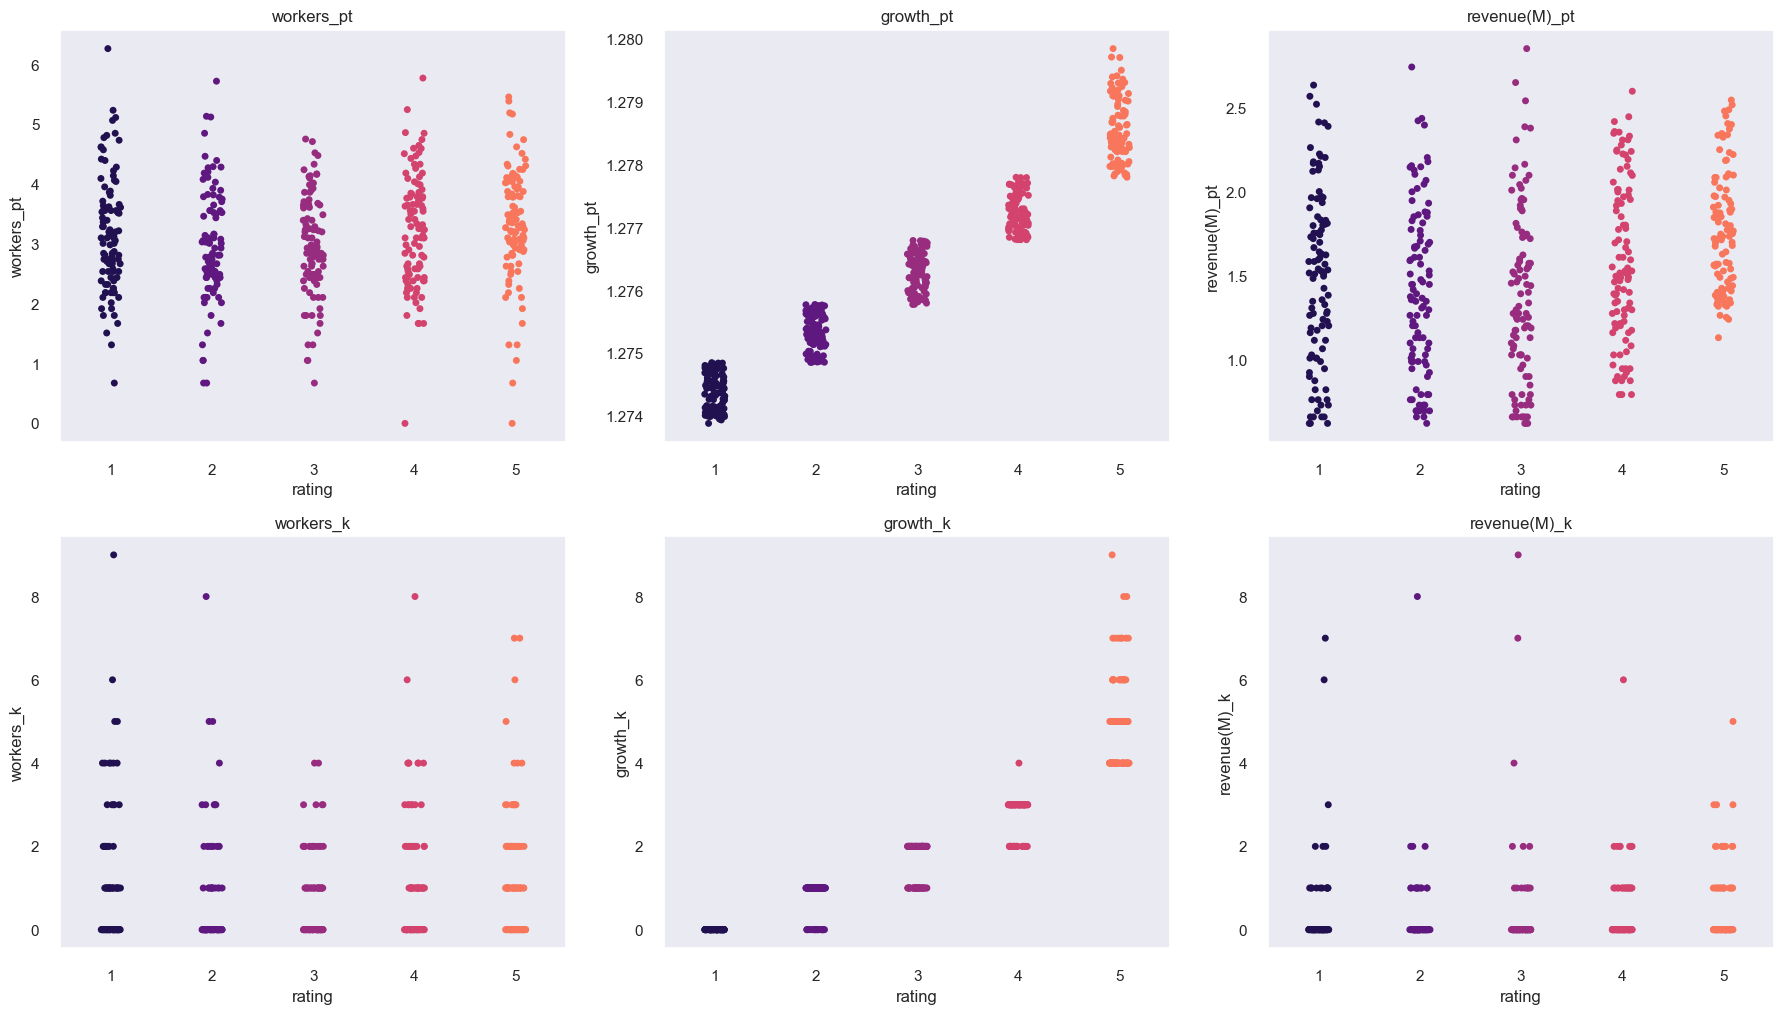

In [40]:
# Call stripplot for pt_cols
target_stripplot(pt_cols.append(k_cols), df_inc, 'rating')

- 'rating' is showing a significant trend relationship with the 'growth' features
- 'revenue' is showing a slight upwards trend with the 'growth' features
- 'workers' is showing little to no trends

#### Viewing 'Rating' Correlation within Categorical Features

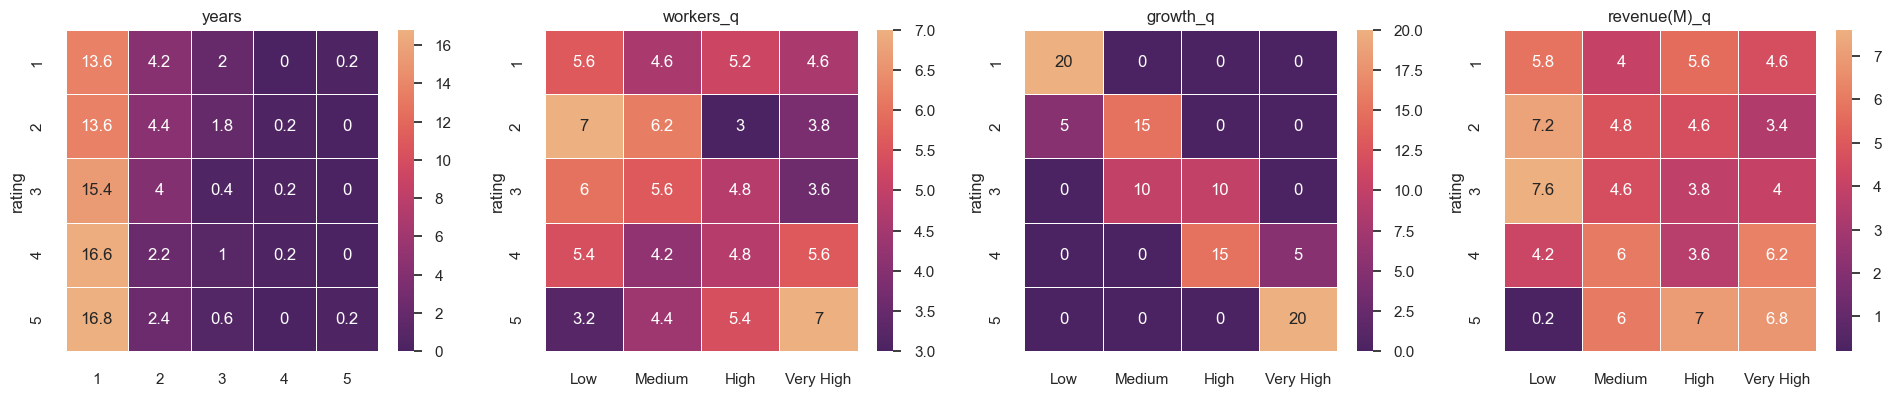

In [41]:
# get target_heatmap
target_heatmap(q_cols.insert(0, 'years'), df_inc, 'rating')

- The above insights are verified here by each feature's heatmap
- 'growth' is showing essentially a perfect correlation with 'rating'
- 'revenue' is showing somewhat of a positive correlation with 'rating'

#### Viewing 'Rating' Correlation with Numerical Features

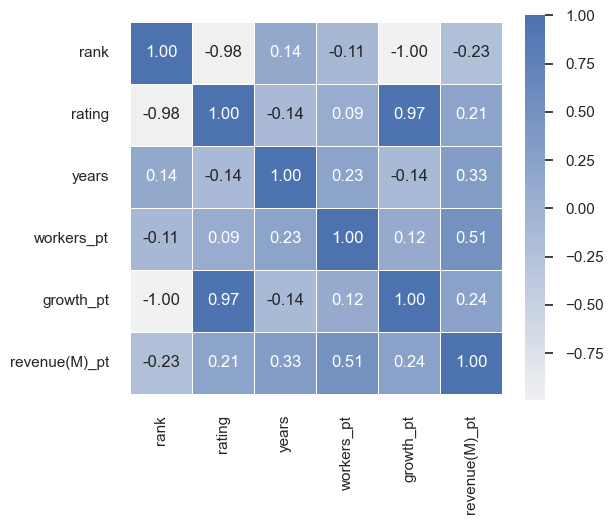

In [42]:
# get heatmap_all
heatmap_all(df_inc.drop(k_cols, axis = 1))

- Again, almost 1:1 correlation between 'growth' and 'rating'
- Correlation between rating and revenue is about %20
- Moderate relationship between 'workers' and 'revenue'
- Somewhat of a relationship between 'years' and 'revenue'

#### Top 25 Locations (Metros) by Average Rank

In [43]:
# create metro_rankings dataframe from metro_state groups with 'rating', 'rank', and 'count' data
metros_avgrating = df_inc.groupby('metro_state').mean()['rating'] # metro by avg rating series

metros_avgrank = df_inc.groupby('metro_state').mean()['rank'] # metro by avg rank series

metros_count = df_inc.groupby('metro_state').count()['rank'] # metro by count series

metros_years = df_inc.groupby('metro_state').mean()['years'] # metro by count series

# creating the dataframe 
metro_rankings = pd.DataFrame({'Num of Companies': metros_count,
                               'Avg. Rating': metros_avgrating,
                                'Avg. Rank': metros_avgrank,
                                'Avg. Years': metros_years})

In [44]:
# create overall performance column calculated based on all metrics
metro_rankings['Overall Performance'] = (metro_rankings['Avg. Rating'] * metro_rankings['Num of Companies'] * metro_rankings['Avg. Years']) / metro_rankings['Avg. Rank'] 

# drop metros with only one company
metro_rankings = metro_rankings.loc[metro_rankings['Num of Companies'] > 2]

# sort values to see best to worst by overall performance
metro_rankings = metro_rankings.sort_values(by = 'Avg. Rank', kind = 'stable')

metro_rankings.head(25)

,Num of Companies,Avg. Rating,Avg. Rank,Avg. Years,Overall Performance
metro_state,,,,,
Detroit_Michigan,6,4.33,128.50,1.17,0.24
Austin_Texas,7,3.71,180.29,1.14,0.16
Jacksonville_Florida,4,3.75,180.50,1.75,0.15
Boulder_Colorado,5,3.60,182.40,1.00,0.10
Boston_Massachusetts,14,3.57,203.21,1.21,0.30
Phoenix_Arizona,13,3.31,211.62,1.38,0.28
Kansas City_Missouri,5,3.40,213.20,1.40,0.11
Salt Lake City_Utah,7,3.29,218.57,1.86,0.20
Columbus_Ohio,4,3.25,224.50,2.00,0.12


# Final Insights and Next Steps

1. Continue to filter metros based on relevant features i.e. average years, number of companies
2. Create different weighted metrics to compare metros
3. Identify prevalency of top industries in metros of focus
4. Rule out metros based on existing coverage
5. Begin building preliminary machine learning recommendation models using LightFM library 